In [16]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import os
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

In [17]:
rds_connection_string = "postgres:group2@35.224.199.242:5432/postgres"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [18]:
conn = engine.connect()

In [19]:
engine.table_names()

<ipython-input-19-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['GameGenres',
 'GamesReleasedPlatforms',
 'videogames',
 'genre_junc',
 'platform_junc',
 'genre_id',
 'all_games',
 'platforms']

In [20]:
csv_path = "../P2/final_csv/Final_allgames.csv"
games_df = pd.read_csv(csv_path, encoding="utf-8")
games_df.head()

,name,critic_score,user_score,year,global_sales,game_id
0,World of Goo,94,8.8,2008.0,0.04,0
1,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,3.38,1
2,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.71,2
3,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.70,3
4,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.21,4


In [21]:
csv_path = "../P2/final_csv/genre_id.csv"
genre_junc = pd.read_csv(csv_path, encoding="utf-8")
genre_junc.head()

,game_id,genre_id
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [22]:
csv_path = "../P2/final_csv/genres.csv"
genres_df = pd.read_csv(csv_path, encoding="utf-8")
genres_df.head()

,genre,genre_id
0,Puzzle,0
1,Action,1
2,Shooter,2
3,Sports,3
4,Racing,4


In [23]:
csv_path = "../P2/final_csv/plat_id.csv"
plat_junc = pd.read_csv(csv_path, encoding="utf-8")
plat_junc.head()

,game_id,platform_id
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [24]:
csv_path = "../P2/final_csv/platforms_id.csv"
platforms_df = pd.read_csv(csv_path, encoding="utf-8")
platforms_df2 = platforms_df.rename(columns = {"Platform":"platform"})
platforms_df2.head()

,platform,platform_id
0,PC,0
1,PS4,1
2,XOne,2
3,PS3,3
4,X360,4


In [25]:
games_df.to_sql(name='videogames', con=engine, if_exists='replace', index=False, method="multi" )
videogames_df = pd.read_sql("Select * From videogames", con=engine)
videogames_df.head()

,name,critic_score,user_score,year,global_sales,game_id
0,World of Goo,94,8.8,2008.0,0.04,0
1,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,3.38,1
2,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.71,2
3,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.70,3
4,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.21,4


In [26]:
videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          93 non-null     object 
 1   critic_score  93 non-null     int64  
 2   user_score    93 non-null     float64
 3   year          93 non-null     float64
 4   global_sales  93 non-null     float64
 5   game_id       93 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.5+ KB


In [27]:
genre_junc.to_sql(name='genre_junc', con=engine, if_exists='replace', index=False, method="multi" )
genre_junc_df = pd.read_sql("Select * From genre_junc", con=engine)
genre_junc_df.head()

,game_id,genre_id
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [28]:
plat_junc.to_sql(name='platform_junc', con=engine, if_exists='replace', index=False, method="multi" )
platform_junc_df = pd.read_sql("Select * From platform_junc", con=engine)
platform_junc_df.head()

,game_id,platform_id
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [29]:
genres_df.to_sql(name='genre_id', con=engine, if_exists='replace', index=False, method="multi" )
genre_df = pd.read_sql("Select * From genre_id", con=engine)
genre_df.head()

,genre,genre_id
0,Puzzle,0
1,Action,1
2,Shooter,2
3,Sports,3
4,Racing,4


In [30]:
platforms_df2.to_sql(name='platforms', con=engine, if_exists='replace', index=False, method="multi" )
platform_df2 = pd.read_sql("Select * From platforms", con=engine)
platform_df2.head()

,platform,platform_id
0,PC,0
1,PS4,1
2,XOne,2
3,PS3,3
4,X360,4


In [39]:
query = """
        select
            v.name, v.critic_score, v.user_score, v.year, v.global_sales, v.game_id, g.genre_id, p.platform_id
        from 
            videogames as v 
        join genre_junc as g on g.game_id=v.game_id
        join platform_junc as p on p.game_id=v.game_id;
        
        """

merge_df = pd.read_sql(query, conn)
merge_df.head()

,name,critic_score,user_score,year,global_sales,game_id,genre_id,platform_id
0,World of Goo,94,8.8,2008.0,0.04,0,0,0
1,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,3.38,1,1,1
2,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.71,2,1,2
3,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.70,3,1,3
4,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.21,4,1,4


In [40]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          93 non-null     object 
 1   critic_score  93 non-null     int64  
 2   user_score    93 non-null     float64
 3   year          93 non-null     float64
 4   global_sales  93 non-null     float64
 5   game_id       93 non-null     int64  
 6   genre_id      93 non-null     int64  
 7   platform_id   93 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 5.9+ KB


In [50]:
query = """
        select
            v.name, v.critic_score, v.user_score, v.year, v.global_sales, v.game_id, i.genre
        from 
            videogames as v 
        join genre_junc as g on g.game_id=v.game_id
        join genre_id as i on i.genre_id=g.genre_id;
        """

merge_genre = pd.read_sql(query, conn)
merge_genre.head()

,name,critic_score,user_score,year,global_sales,game_id,genre
0,World of Goo,94,8.8,2008.0,0.04,0,Puzzle
1,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,3.38,1,Action
2,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.71,2,Action
3,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.70,3,Action
4,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.21,4,Action


In [51]:
query = """
        select
            v.name, v.critic_score, v.user_score, v.year, v.global_sales, v.game_id, p.platform
        from 
            videogames as v 
        join platform_junc as j on j.game_id=v.game_id
        join platforms as p on p.platform_id=j.platform_id;
        """

merge_plat = pd.read_sql(query, conn)
merge_plat.head()

,name,critic_score,user_score,year,global_sales,game_id,platform
0,World of Goo,94,8.8,2008.0,0.04,0,PC
1,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,3.38,1,PS4
2,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.71,2,XOne
3,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.70,3,PS3
4,Metal Gear Solid V: The Phantom Pain,95,7.4,2015.0,0.21,4,X360


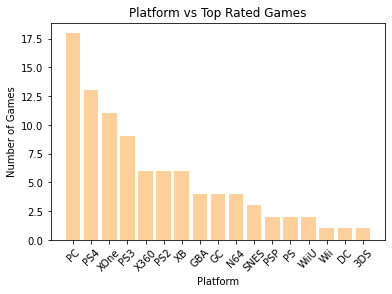

In [58]:
y = merge_plat['platform'].value_counts()
x = merge_plat.platform.unique()

plt.bar(x, y, color='#FFCF9C')
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("Platform vs Top Rated Games")
plt.xticks(rotation=45)
plt.savefig("platform.png", bbox_inches='tight')
plt.show()

In [85]:
df_gen = merge_genre['genre'].value_counts().to_frame().reset_index()
df_gen = df_gen.rename(columns = {"index": "genre", "genre":"count"})
df_gen

,genre,count
0,Action,45
1,Shooter,19
2,Sports,14
3,Role-Playing,6
4,Platform,4
5,Racing,2
6,Fighting,2
7,Puzzle,1


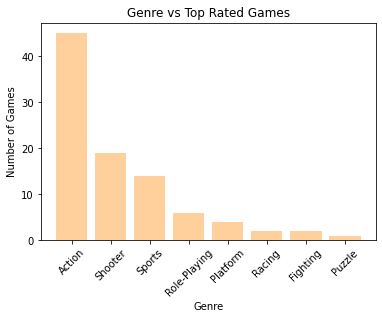

In [92]:
plt.bar(df_gen.genre, df_gen['count'], color='#FFCF9C')
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.title("Genre vs Top Rated Games")
plt.xticks(rotation=45)
plt.savefig("genre.png", bbox_inches='tight')
plt.show()

In [77]:
merge_plat['platform'].value_counts()

PC      18
PS3     13
X360    11
PS2      9
GC       6
XB       6
N64      6
Wii      4
PS       4
GBA      4
PS4      3
WiiU     2
DC       2
XOne     2
PSP      1
3DS      1
SNES     1
Name: platform, dtype: int64

In [78]:
df_plat = merge_plat['platform'].value_counts().to_frame().reset_index()
df_plat = df_plat.rename(columns = {"index": "platform", "platform":"count"})
df_plat

,platform,count
0,PC,18
1,PS3,13
2,X360,11
3,PS2,9
4,GC,6
5,XB,6
6,N64,6
7,Wii,4
8,PS,4
9,GBA,4


In [79]:
df_plat.columns

Index(['platform', 'count'], dtype='object')

In [82]:
df_plat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  17 non-null     object
 1   count     17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [80]:
df_plat.platform.unique()

array(['PC', 'PS3', 'X360', 'PS2', 'GC', 'XB', 'N64', 'Wii', 'PS', 'GBA',
       'PS4', 'WiiU', 'DC', 'XOne', 'PSP', '3DS', 'SNES'], dtype=object)

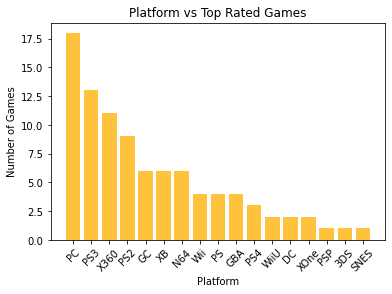

In [91]:

plt.bar(df_plat.platform, df_plat['count'], color='#FEC23C')
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("Platform vs Top Rated Games")
plt.xticks(rotation=45)
plt.savefig("platform.png", bbox_inches='tight')
plt.show()